# 🚀 Project

# SOLUTIONS

When you are figuring out what filepath to use, you can use `os.listdir([PATH])` to list all subdirectories in a path. For example, let's see what directories are available to us in the current folder (noted with a dot `.`).

🔔 **Question**: In this current folder we're checking out, which items are folders and which are files? (**Hint:** You can double check by looking at the files in JupyterLab/ Jupyter Notebook).

### 1.1 Find the Data

Use `os.listdir()` to see the files in the "chis_data" folder, which is in the "data" folder, which is in the main "Python-Fundamentals" folder.

💡 **Tip**: Remember how to move up in the folder structure? `../../` goes up two folders!

💡 **Tip**: You can use Jupyter Lab's File Browser to the left of your screen to get a sense of where the "chis_data" folder is.

In [10]:
# YOUR CODE HERE

os.listdir('../../data/chis_data')


['chi_esp.csv', 'chi_eng.csv', 'chi_other.csv']

### 1.2 Load in a single file

We have 3 csv files based on the language in which the Health Interview was held.
L
et's load in one of these CSV files.

1. Read in the `chis_esp.csv` file as a `pandas` object.
2. How many rows are there? How many columns?

In [12]:
import pandas as pd

# Load in file
chis_esp = pd.read_csv('../../data/chis_data/chis_esp.csv')

### 1.3 Load in Multiple Files

It looks like the CSV files we have are sorted by language. We want to combine these files in one big dataframe using a loop.
However, we notice that there is a `.txt` file in the directory, which isn't a `pandas` dataframe. This will cause an error in the dataframe processing, so let's use an `if` statement to filter out the `.txt` extension. 

Slice the last 3 characters of the `test_csv` variable and use the equality operator (`==`) to return `True`.

💡 **Tip**: Recall slicing the last elements of a list. For instance, use `some_list[-2:]` to get the last two items.

In [17]:
test_csv = 'chis_esp.csv' # Expression should evaluate True

# YOUR CODE HERE
test_csv[-3:] == 'csv'

True

Now that we have an expression, let's create a for-loop to check if it works over the files in our folder. 

In [37]:
directory = '../../data/chis_data'
for file in os.listdir(directory):
    if file[-3:] == 'csv': # Fill in the blank to filter for files ending with `.csv`
        print(file)

chis_other.csv
chis_eng.csv
chis_esp.csv


## 🥊 Challenge: Putting it all together

We've got most of the pieces. Now let's put the puzzle together:
1) Initialize an *accumulator* list called `df_list`.
2) Reuse the `for`-loop we just created to loop over the csv files in the right folder. But in the final line, instead of `print`ing the file, read it as a DataFrame and `append` the output to our `df_list` list.

⚠️ Warning: When calling `read_csv()`, you will need to input the **full filepath**, or the file will not be found!

In [76]:
# YOUR CODE HERE
df_list = []
directory = '../../data/chis_data'
for file in os.listdir(directory):
    if file[-3:] == 'csv': # Fill in the blank to filter for files ending with `csv`
        df = pd.read_csv(directory + '/' + file)
        df_list.append(df)        


Finally, look up the [documentation for Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html), and see if you can find a function that **concatenates** the list of DataFrames we have now. We'll save the concatenated list in a variable called `df`.

In [77]:
# YOUR CODE HERE
df = pd.concat(df_list)


🔔 **Question**: Let's take a look at the final data frame.

1. How many rows and columns are there in the total dataframe?
2. How many numeric columns are there in the dataset?
3. Which columns look interesting to you?

In [78]:
# YOUR CODE HERE
print(df.shape)
df.head()

(22160, 20)


,ethnicity,age,gender,edu_attainment,fam_size,general_health,diabetes,high_blood_pr,overweight,doctor_visits_lastyear,fruit_perweek,veg_perweek,cur_insured,feel_left_out,difficult_concentrating,poverty_level,household_tenure,feel_safe_neighborhood,voting_freq_presid,interview_language
0,"ASIAN ONLY, NH",75-79 YEARS,FEMALE,NO FORMAL EDUCATION OR GRADE 1-8,1,VERY GOOD,NO,YES,YES,5 TIMES,21,21,YES,HARDLY EVER,NO,0-99% FPL,RENT/SOME OTHER ARRANGEMENT,MOST OF THE TIME,ALWAYS,OTHER LANGUAGE
1,"ASIAN ONLY, NH",70-74 YEARS,FEMALE,NO FORMAL EDUCATION OR GRADE 1-8,1,FAIR,NO,YES,NO,2 TIMES,7,14,YES,SOME OF THE TIME,NO,0-99% FPL,RENT/SOME OTHER ARRANGEMENT,MOST OF THE TIME,INAPPLICABLE,OTHER LANGUAGE
2,"ASIAN ONLY, NH",55-59 YEARS,MALE,GRADE 12/H.S. DIPLOMA,2,POOR,YES,YES,YES,9-12 TIMES,0,7,NO,INAPPLICABLE,NO,200-299% FPL,RENT/SOME OTHER ARRANGEMENT,ALL OF THE TIME,ALWAYS,OTHER LANGUAGE
3,"ASIAN ONLY, NH",75-79 YEARS,MALE,GRADE 9-11,2,GOOD,YES,NO,NO,5 TIMES,7,14,YES,HARDLY EVER,NO,200-299% FPL,OWN,ALL OF THE TIME,NEVER,OTHER LANGUAGE
4,"ASIAN ONLY, NH",75-79 YEARS,MALE,BA OR BS DEGREE/SOME GRAD SCHOOL,2,GOOD,NO,YES,YES,5 TIMES,5,7,YES,HARDLY EVER,NO,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,MOST OF THE TIME,SOMETIMES,OTHER LANGUAGE


## 2. Data Processing

### 2.1 Exploratory Data Analysis (EDA)

Now let's do some Exploratory Data Analysis. One thing we will want to do is count values of interesting features. Run `value_counts()` on the `feel_left_out` column and normalize the output.


In [12]:
# YOUR CODE HERE
df['feel_left_out'].value_counts(normalize=True)


INAPPLICABLE        0.618457
HARDLY EVER         0.298375
SOME OF THE TIME    0.071119
OFTEN               0.011688
PROXY SKIPPED       0.000361
Name: feel_left_out, dtype: float64


One thing we will want to do is look at potential correlations between features that we think might be interesting to pursue further. 

Pick two of them, then 



### 2.2 Quantiles

We can use the `quantile()` method to calculate the q-th quantile of the data along a specified axis. Try to find the amount of fruits eaten by the top 1% of respondents.

In [13]:
# YOUR CODE HERE

df['fruit_perweek'].quantile(0.99)

42.0

### 2.3 Cross-tabulate
We can use the `crosstab()` method to cross-tabulate poverty level and health. 

In [14]:
pd.crosstab(index=df['poverty_level'], columns=df['general_health'])

general_health,EXCELLENT,FAIR,GOOD,POOR,VERY GOOD
poverty_level,,,,,
0-99% FPL,230,407,653,153,482
100-199% FPL,336,575,961,168,783
200-299% FPL,376,393,960,90,981
300% FPL AND ABOVE,3245,1068,3931,218,6150


Look at the crosstab [documentation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) and look for aruments that allow you to get the normalized values, and include subtotals.

Get the cross tab of `poverty_level` and `general_health`. Normalize them and print the subtotals. 

In [40]:
# YOUR CODE HERE

pd.crosstab(index=df['poverty_level'], columns=df['general_health'],
            normalize='index',margins=True)


general_health,EXCELLENT,FAIR,GOOD,POOR,VERY GOOD
poverty_level,,,,,
0-99% FPL,0.119481,0.211429,0.339221,0.079481,0.250390
100-199% FPL,0.119022,0.203684,0.340418,0.059511,0.277365
200-299% FPL,0.134286,0.140357,0.342857,0.032143,0.350357
300% FPL AND ABOVE,0.222078,0.073091,0.269025,0.014919,0.420887
All,0.188944,0.110244,0.293547,0.028384,0.378881


### 2.4 Grouping

Use `group_by()` to get the **means** of the amount of veggies eaten per week (`veg_perweek`) when grouping by `general_health`. Sort the mean from small to large.

In [16]:
# YOUR CODE HERE
df["veg_perweek"].groupby(df["general_health"]).mean().sort_values()


general_health
POOR          7.871224
FAIR          8.455997
GOOD          9.234896
VERY GOOD    10.466174
EXCELLENT    11.824218
Name: veg_perweek, dtype: float64

### 2.5 Dummy variables
We can create dummy variables using the `get_dummies()` method.
Use `get_dummies()` to dummify the `general_health` column.

In [33]:
# YOUR CODE HERE
pov_health = pd.get_dummies(data=df, columns=['general_health'])

### 2.6 Visualizing Correlations

Let's try to find out if there's a correspondence between **poverty level** and **poor general health**.

Getting the correlations between features is easily done using `.corr()`

In [34]:
pov_health.corr()

,fam_size,fruit_perweek,veg_perweek,general_health_EXCELLENT,general_health_FAIR,general_health_GOOD,general_health_POOR,general_health_VERY GOOD
fam_size,1.000000,0.056616,0.076493,0.067198,-0.056494,-0.024851,-0.050623,0.022906
fruit_perweek,0.056616,1.000000,0.532069,0.055461,-0.020875,-0.040391,-0.016919,0.012429
veg_perweek,0.076493,0.532069,1.000000,0.081899,-0.054697,-0.051709,-0.036206,0.030159
general_health_EXCELLENT,0.067198,0.055461,0.081899,1.000000,-0.169896,-0.311127,-0.082496,-0.376969
general_health_FAIR,-0.056494,-0.020875,-0.054697,-0.169896,1.000000,-0.226902,-0.060164,-0.274919
general_health_GOOD,-0.024851,-0.040391,-0.051709,-0.311127,-0.226902,1.000000,-0.110177,-0.503455
general_health_POOR,-0.050623,-0.016919,-0.036206,-0.082496,-0.060164,-0.110177,1.000000,-0.133493
general_health_VERY GOOD,0.022906,0.012429,0.030159,-0.376969,-0.274919,-0.503455,-0.133493,1.000000


Use [Matplotlib](https://matplotlib.org/) or [Seaborn](https://seaborn.pydata.org/) to visualize the correlation using a barplot. Click on them to read their documentation if you need a refresher!

<AxesSubplot:xlabel='poverty_level', ylabel='general_health_POOR'>

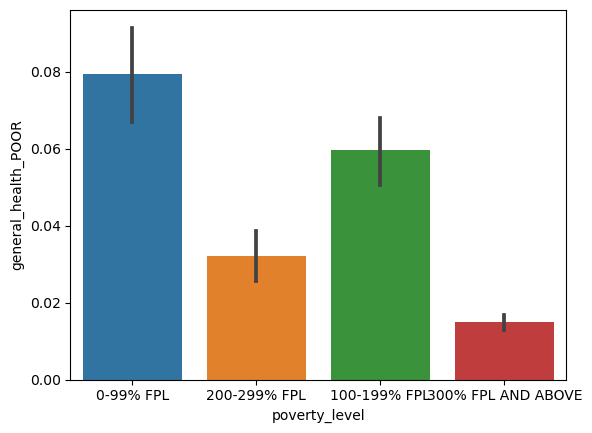

In [36]:
# YOUR CODE HERE
import seaborn as sns

sns.barplot(data=pov_health, x="poverty_level", y="general_health_POOR")

